# Biomass at surface and 100m for each plankton:
* functional group 
* each size class. 


In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import numpy as np
from matplotlib.pyplot import figure
import pylab 
from cartopy.util import add_cyclic_point

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

import scipy.io as sio

## 1990 to 2009 monthly data
this data set contains: 
* global data at every month from 1990 to 2009
* global data at every depth level from 0 meters to 4000meters. 
* every variable in the model. 

In [2]:
ds = xr.open_dataset('/glade/work/gabyn/MARBL_spectra/remapgrid.out1.nc')

# Abundance using depth-averaged biomass 
$$Abundance = \frac{Biomass}{Mass}$$
Where: 
* $biomass$ is in units of [$\frac{\mu gC}{m^3}$] 
* $mass$ is in [$\mu g C$]
    * converting the $Abundance$ into units of [$\frac{cell}{ m^3}$]
​
We want unts of: 
* $\frac{cell}{L}$ for both zooplankton and phytoplankton

In [3]:
abundance = sio.loadmat('mat_files/plankton_abundance_zavg_z.mat')
phy_ab = abundance['phy_ab']
zoo_ab =abundance['zoo_ab']
phy_ab[phy_ab<0] = 0
zoo_ab[zoo_ab<0] = 0

# zooplankton abundance at 100m

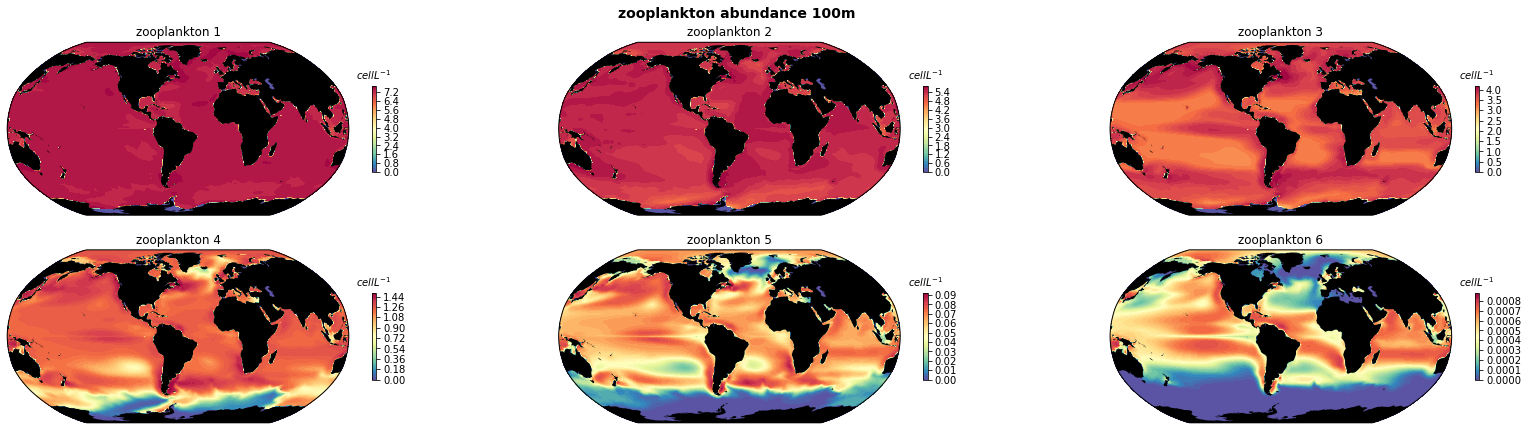

In [10]:
fig = plt.figure(figsize=(28, 7))
lat = ds.lat

# phytoplankton names 
phyto_names = ['zooplankton 1','zooplankton 2','zooplankton 3',
              'zooplankton 4','zooplankton 5','zooplankton 6']

for i in range(1,7):
    ax = fig.add_subplot(2, 3, i, projection=ccrs.Robinson(central_longitude=305.0))
    phyto, lon = add_cyclic_point(np.log10(np.nanmean(zoo_ab[i-1,:,10,:,:], axis = 0)+1), coord=ds.lon, axis=1)
    cf = ax.contourf(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(), levels = 50)
    land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))
    ax.set_title(''+str(phyto_names[i-1]))
    cbar = plt.colorbar(cf, shrink=0.5)
    cbar.ax.set_title('$cell L^{-1}$', fontsize = 10)
    
fig.suptitle('zooplankton abundance 100m', x=0.5, y=.95,fontsize=14, fontweight='bold')
fig.savefig('zoo_ab_annual_100m.png', dpi=300, bbox_inches='tight')

# zooplankton abundance at surface

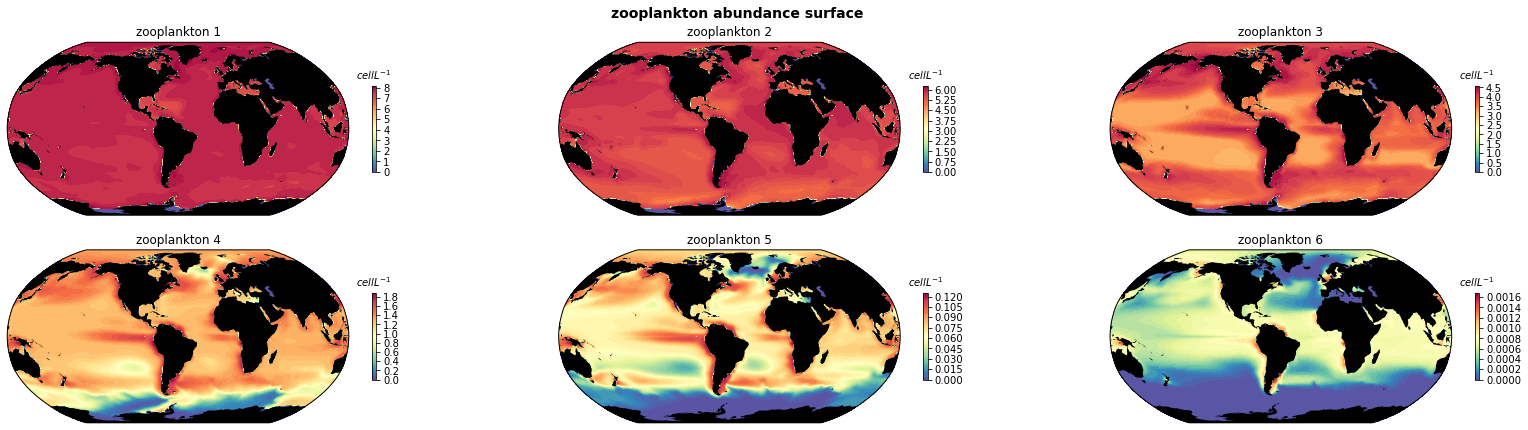

In [11]:
fig = plt.figure(figsize=(28, 7))
lat = ds.lat

# phytoplankton names 
phyto_names = ['zooplankton 1','zooplankton 2','zooplankton 3',
              'zooplankton 4','zooplankton 5','zooplankton 6']

for i in range(1,7):
    ax = fig.add_subplot(2, 3, i, projection=ccrs.Robinson(central_longitude=305.0))
    phyto, lon = add_cyclic_point(np.log10(np.nanmean(zoo_ab[i-1,:,1,:,:], axis = 0)+1), coord=ds.lon, axis=1)
    cf = ax.contourf(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(), levels = 50)
    land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))
    ax.set_title(''+str(phyto_names[i-1]))
    cbar = plt.colorbar(cf, shrink=0.5)
    cbar.ax.set_title('$cell L^{-1}$', fontsize = 10)
    
fig.suptitle('zooplankton abundance surface', x=0.5, y=.95,fontsize=14, fontweight='bold')
fig.savefig('zoo_ab_annual_surf.png', dpi=300, bbox_inches='tight')

## Phytoplankton abundance at 100m, for each plankton group. 

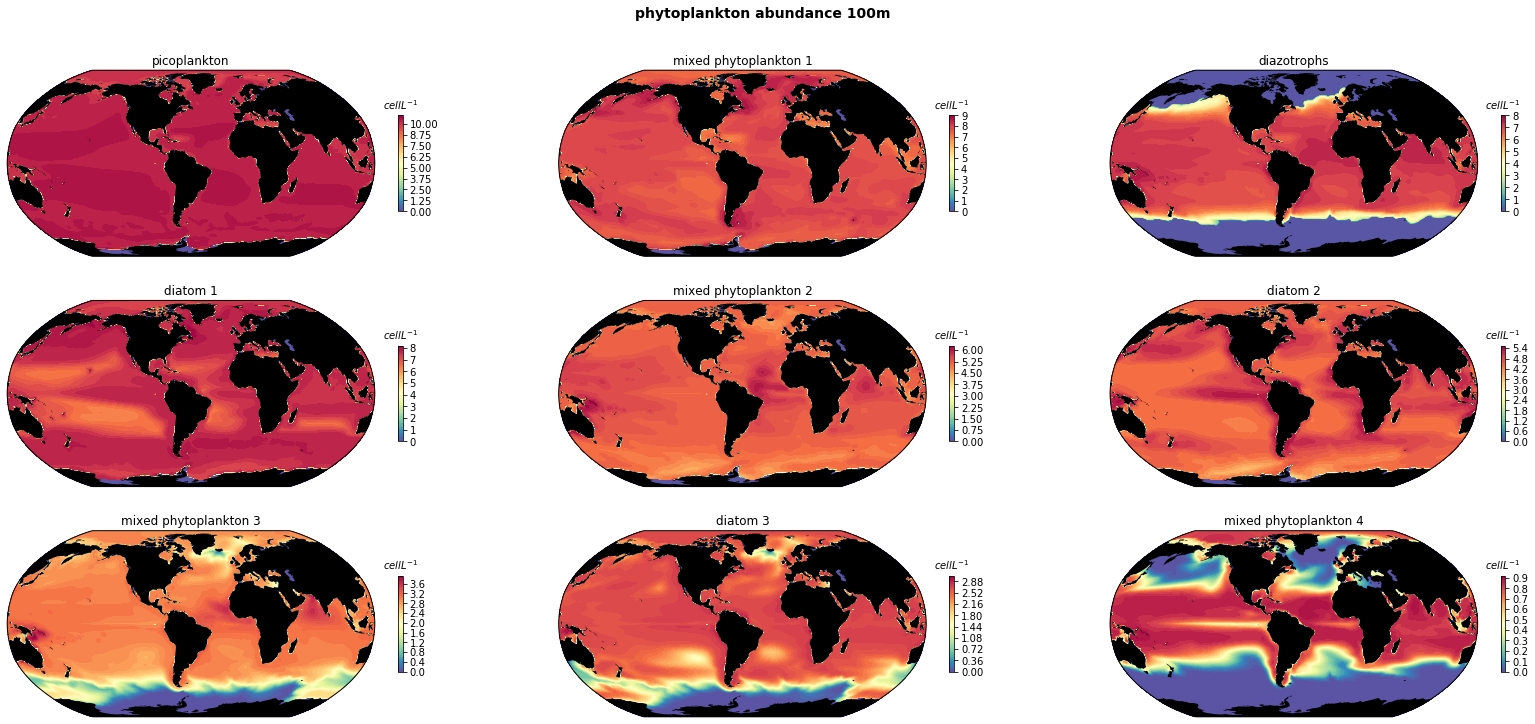

In [12]:
fig = plt.figure(figsize=(28, 12))
lat = ds.lat

# phytoplankton names 
phyto_names = ['picoplankton', 'mixed phytoplankton 1','diazotrophs','diatom 1',
              'mixed phytoplankton 2','diatom 2','mixed phytoplankton 3','diatom 3',
              'mixed phytoplankton 4']

for i in range(1,10):
    ax = fig.add_subplot(3, 3, i, projection=ccrs.Robinson(central_longitude=305.0))
    phyto, lon = add_cyclic_point(np.log10(np.nanmean(phy_ab[i-1,:,10,:,:], axis = 0)+1), coord=ds.lon, axis=1)
    cf = ax.contourf(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(), levels = 50)
    land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))
    ax.set_title(''+str(phyto_names[i-1]))
    cbar = plt.colorbar(cf, shrink=0.5)
    cbar.ax.set_title('$cell L^{-1}$', fontsize = 10)
    
fig.suptitle('phytoplankton abundance 100m', x=0.5, y=.95,fontsize=14, fontweight='bold')
fig.savefig('phyto_ab_annual_100m.png', dpi=300, bbox_inches='tight')

## phytoplankton abundance at surface, for each plankton group

NameError: name 'cm' is not defined

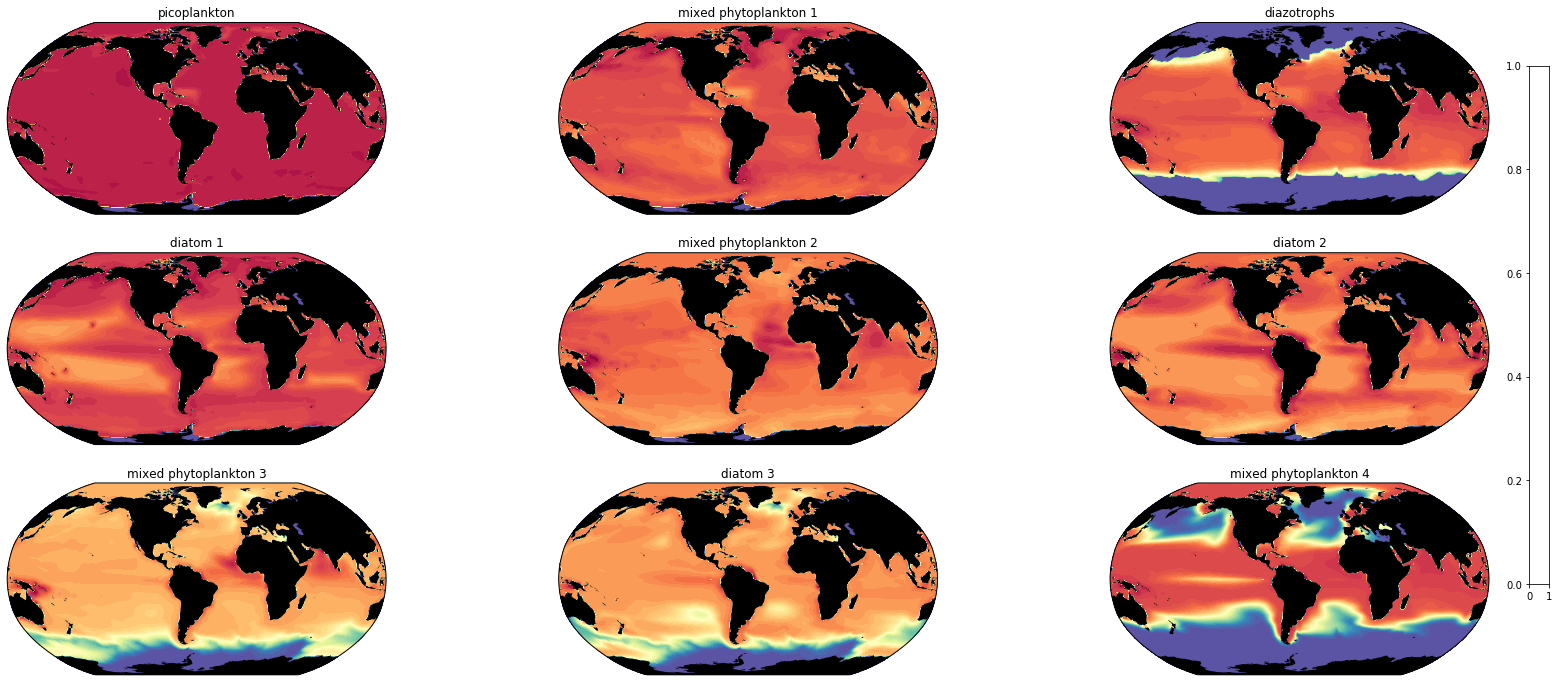

In [13]:
fig = plt.figure(figsize=(28, 12))
lat = ds.lat

# phytoplankton names 
phyto_names = ['picoplankton', 'mixed phytoplankton 1','diazotrophs','diatom 1',
              'mixed phytoplankton 2','diatom 2','mixed phytoplankton 3','diatom 3',
              'mixed phytoplankton 4']

for i in range(1,10):
    ax = fig.add_subplot(3, 3, i, projection=ccrs.Robinson(central_longitude=305.0))
    phyto, lon = add_cyclic_point(np.log10(np.nanmean(phy_ab[i-1,:,1,:,:], axis = 0)+1), coord=ds.lon, axis=1)
    cf = ax.contourf(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(), levels = 50)
    land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))
    ax.set_title(''+str(phyto_names[i-1]))
    #cbar = plt.colorbar(cf, shrink=0.5)
    #cbar.ax.set_title('$cell L^{-1}$', fontsize = 10)
    
cb_ax = fig.add_axes([0.9, 0.23, 0.01, 0.6])
cbar = fig.colorbar(cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=np.nanmin(phyto), vmax=np.nanmax(phyto)), cmap='Spectral_r',cax=cb_ax, extend = 'both'))
cbar.ax.set_title('$mmol/m^3$', fontsize = 14)
    
fig.suptitle('phytoplankton abundance surface', x=0.5, y=.95,fontsize=14, fontweight='bold')
fig.savefig('phyto_ab_annual_surface.png', dpi=300, bbox_inches='tight')

## abundances by functional size

In [4]:
pp1 = phy_ab[0,:,:,:,:]
mp1 = np.nansum(phy_ab[4:8,:,:,:,:], axis =0)
np1 = np.nansum(phy_ab[1:3,:,:,:,:], axis =0)

In [1]:
fig = plt.figure(figsize=(10, 16))
lat = ds.lat

#microplankton
ax = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.nanmean((mp1[:,1,:,:]), axis = 0), coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(),cmap='Spectral_r')
ax.set_title('surface micoplankton')
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))

# nanoplankton
ax1 = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.nanmean((np1[:,1,:,:]), axis = 0), coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), cmap='Spectral_r')
ax1.set_title('surface nanoplankton')
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))

#picoplankton
ax2 = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(np.nanmean((pp1[:,1,:,:]), axis = 0), coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, phyto,transform=ccrs.PlateCarree(), cmap='Spectral_r')
ax2.set_title('surface picoplankton')
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))

cb_ax = fig.add_axes([0.95, 0.1, 0.01, 0.8])
cbar = fig.colorbar(cf, cax=cb_ax, shrink=0.5)
cbar.ax.set_title('$cell L^{-1}$', fontsize = 10)

fig.savefig('abundance_size_fraction_surface_annual.png', dpi=600, bbox_inches='tight')

NameError: name 'plt' is not defined